In [1]:
import g3lhalo
import pyccl as ccl
import matplotlib.pyplot as plt
import numpy as np

# Example for (3D) Bispectra
We show here how to compute matter-matter-galaxy, and matter-galaxy-galaxy bispectra with the halo model

## Defining the model
See `exampleHalomodelIngredients.ipynb` for details

In [2]:
# Cosmology
cosmo = {
    'Om_c': 0.28,
    'Om_b': 0.05,
    'h': 0.67,
    'sigma_8': 0.8,
    'n_s': 0.96
}

# Halo mass function
hmf=ccl.halos.MassFuncSheth99()

# Halo bias
hbf=ccl.halos.HaloBiasSheth01()

# Concentration mass Relation
cmfunc=ccl.halos.ConcentrationDuffy08()


# HOD
# HOD parameters
alpha=1
sigma=0.2
Mth=1e12
Mprime=20*Mth
beta=1

# Correlation between galaxy populations
A=0 # 0 ==> No correlation between populations
epsilon=0

# Scaling of halo profile concentration
flens=1 # 1 ==> Same as dark matter

# Get HOD
hod_cen, hod_sat = g3lhalo.HOD_Zheng(alpha, Mth, sigma, Mprime, beta)

# Define model
model = g3lhalo.halomodel(verbose=True, cosmo=cosmo, hmfunc=hmf, hbfunc=hbf, cmfunc=cmfunc)
model.set_hods(hod_cen, hod_sat, A=A, epsilon=epsilon, flens1=flens, flens2=flens)

Setting cosmology
Om_c: 0.28
Om_b: 0.05
h: 0.67
sigma_8: 0.8
n_s: 0.96
Also setting linear matter power spectrum
Setting halo mass function
<pyccl.halos.hmfunc.sheth99.MassFuncSheth99>
	mass_def = MassDef(Delta=fof, rho_type=matter)
Setting halo bias function
<pyccl.halos.hbias.sheth01.HaloBiasSheth01>
	mass_def = MassDef(Delta=fof, rho_type=matter)
Setting concentration mass relation
<pyccl.halos.concentration.duffy08.ConcentrationDuffy08>
	mass_def = MassDef(Delta=200, rho_type=critical)
	mass_def_strict = True


## Calculate Power spectrum
We first calculate the matter-matter, matter-galaxy, and galaxy-galaxy power spectra. This is not strictly necessary for getting the bispectra. But, later we want to plot the reduced bispectra, so this becomes necessary. The non-linear power spectra always give the 1- and 2-halo term seperate, as well as their sum. The parameters `type1` and `type2` specify which lenses (population 1 or 2) shall be correlated.

In [3]:
ks = np.geomspace(1e-3, 1e2)
z=0

# Linear matter power spectrum
Pk_lin = model.pk_lin(ks, z)

# Matter-Matter power spectrum
#Pk_ss_1h, Pk_ss_2h, Pk_ss = model.source_source_ps(ks, z)


# Matter-Galaxy power spectrum
Pk_sl_1h, Pk_sl_2h, Pk_sl = model.source_lens_ps(ks, z, type=1)


# Galaxy-Galaxy power spectrum
Pk_ll_1h, Pk_ll_2h, Pk_ll = model.lens_lens_ps(ks, z, type1=1, type2=1)

/home/laila/CodeRepos/G3LHalo_python/g3lhalo/halomodel.py:252: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral.append(integrate.quad(kernel, mmin, mmax)[0])
/home/laila/CodeRepos/G3LHalo_python/g3lhalo/halomodel.py:269: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  integral2.append(integrate.quad(kernel, mmin, mmax)[0])


# Matter-Galaxy-Galaxy bispectrum
Now we calculate the matter-galaxy-galaxy bispectrum

In [4]:
# Matter-Galaxy-Galaxy

B1h_sll=[]
B2h_sll=[]
B3h_sll=[]
B_sll=[]

for k in ks:
    B1h, B2h, B3h, B = model.source_lens_lens_bs(k, k, k, z,  type1=1, type2=1)
    B1h_sll.append(B1h)
    B2h_sll.append(B2h)
    B3h_sll.append(B3h)
    B_sll.append(B)

B1h_sll=np.array(B1h_sll)
B2h_sll=np.array(B2h_sll)
B3h_sll=np.array(B3h_sll)
B_sll=np.array(B_sll)


/home/laila/CodeRepos/G3LHalo_python/g3lhalo/halomodel.py:291: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral = integrate.quad(kernel, mmin, mmax)[0]
/home/laila/CodeRepos/G3LHalo_python/g3lhalo/halomodel.py:300: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling

In [6]:
# Get Reduced bispectrum

Q1h_sll=B1h_sll/(Pk_sl**2+2*Pk_ll*Pk_sl)
Q2h_sll=B2h_sll/(Pk_sl**2+2*Pk_ll*Pk_sl)
Q3h_sll=B3h_sll/(Pk_sl**2+2*Pk_ll*Pk_sl)
Q_sll=B_sll/(Pk_sl**2+2*Pk_ll*Pk_sl)

Text(0, 0.5, '$Q(k,k,k)$')

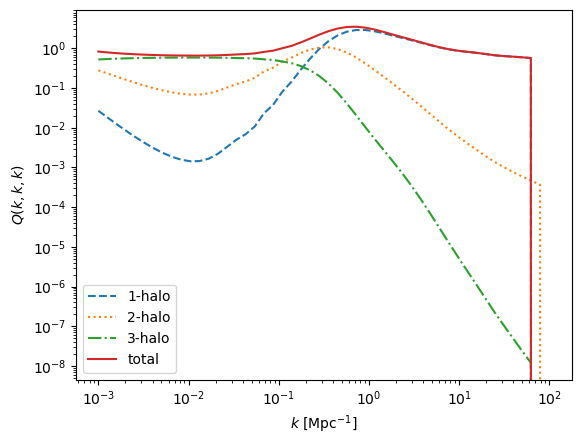

In [11]:
# Plot

plt.loglog(ks, Q1h_sll, label='1-halo', ls='--')
plt.loglog(ks, Q2h_sll, label='2-halo', ls=':')
plt.loglog(ks, Q3h_sll, label='3-halo', ls='-.')
plt.loglog(ks, Q_sll, label='total')
plt.legend()

plt.xlabel(r'$k$ [Mpc$^{-1}$]')
plt.ylabel(r'Matter-Galaxy-Galaxy $Q(k,k,k)$')


# Matter-Matter-Galaxy bispectrum
Now we calculate the matter-matter-galaxy bispectrum

In [12]:
# Matter-Matter-Galaxy

B1h_ssl=[]
B2h_ssl=[]
B3h_ssl=[]
B_ssl=[]

for k in ks:
    B1h, B2h, B3h, B = model.source_source_lens_bs(k, k, k, z,  type=1)
    B1h_ssl.append(B1h)
    B2h_ssl.append(B2h)
    B3h_ssl.append(B3h)
    B_ssl.append(B)

B1h_ssl=np.array(B1h_ssl)
B2h_ssl=np.array(B2h_ssl)
B3h_ssl=np.array(B3h_ssl)
B_ssl=np.array(B_ssl)


TypeError: halomodel.u_NFW() missing 1 required positional argument: 'z'

In [ ]:
# Get Reduced bispectrum

Q1h_ssl=B1h_ssl/(Pk_sl**2+2*Pk_ss*Pk_sl)
Q2h_ssl=B2h_ssl/(Pk_sl**2+2*Pk_ss*Pk_sl)
Q3h_ssl=B3h_ssl/(Pk_sl**2+2*Pk_ss*Pk_sl)
Q_ssl=B_ssl/(Pk_sl**2+2*Pk_ss*Pk_sl)

In [ ]:
# Plot

plt.loglog(ks, Q1h_ssl, label='1-halo', ls='--')
plt.loglog(ks, Q2h_ssl, label='2-halo', ls=':')
plt.loglog(ks, Q3h_ssl, label='3-halo', ls='-.')
plt.loglog(ks, Q_ssl, label='total')
plt.legend()

plt.xlabel(r'$k$ [Mpc$^{-1}$]')
plt.ylabel(r'Matter-Matter-Galaxy $Q(k,k,k)$')
